**Importer les outils**

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur

**Définir les constantes du problème**

In [0]:
k1 = 0.25
k2 = 0.1 
k3 = 5 

Vdot = 10 # L*min^-1

CA0 = 1.5 # mol*L-1
FA0 = CA0 * Vdot

CB0 = 2 # mol*L-1
FB0 = CB0 * Vdot

FC0 = 0
FD0 = 0
FE0 = 0
FF0 = 0

**Définir les équations à résoudre**

In [0]:
def equation(variables, V, k1, k2, k3, Vdot):
  FA, FB, FC , FD, FE, FF =  variables
  
  CA = FA / Vdot
  CB = FB / Vdot
  CC = FC / Vdot
  CD = FD / Vdot
  CE = FE / Vdot
  CF = FF / Vdot
  
  
  r1 = k1 * CA * CB
  r2 = k2 * CA * CD
  r3 = k3 * CB**2 * CC
  
  RA = - r1 - 3 * r2
  RB = - 2 * r1 - r3
  RC = r1 + r2 - 2 * r3
  RD = r1 - 2 * r2 + r3
  RE = r2
  RF = r3
  
  dFAdV = RA
  dFBdV = RB
  dFCdV = RC
  dFDdV = RD
  dFEdV = RE
  dFFdV = RF
  
  
  return dFAdV, dFBdV, dFCdV, dFDdV, dFEdV, dFFdV

**Définir les conditions initiales**

In [0]:
conditions_initiales=[FA0, FB0, FC0, FD0, FE0, FF0] 

**Résoudre le probème à l'aide du solveur**

In [0]:
V = np.arange(0, 50.1, 0.01)    # définir les bornes d'intégration 
                              
resultat = solveur.odeint(
    equation, 
    conditions_initiales, 
    V, 
    (k1, k2, k3, Vdot)
)                             #quoi résoudre, conditions init, plage de valeurs

In [0]:
FA = resultat[:,0]            #[toutes les lignes :, premiere colonne]

In [0]:
x = (FA0 - FA) / FA0

In [0]:
FC = resultat[:,2]
CC = FC / Vdot

**Visualiser les résultats**

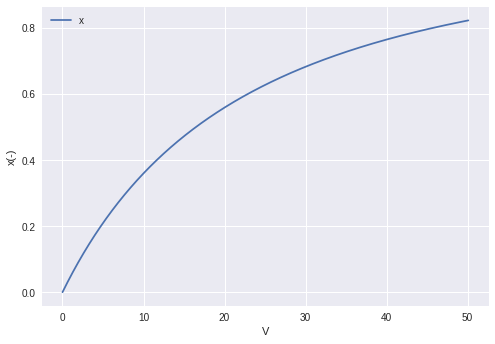

In [87]:
plt.plot(V, x)                #comment varie x 
plt.xlabel('V')
plt.ylabel('x(-)')
plt.legend(['x'])             #légendes des courbes présentées
plt.show()

In [88]:
x[V>50][0]

0.8227550387987186

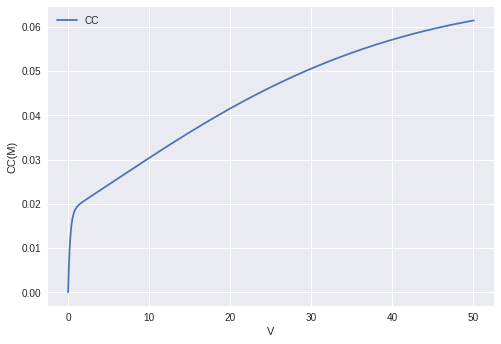

In [89]:
plt.plot(V, CC) #comment varie x 
plt.xlabel('V')
plt.ylabel('CC(M)')
plt.legend(['CC']) #légendes des courbes présentées
plt.show()

In [90]:
CC[V>50][0]

0.061425519814546484